<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/UAS/14_DeepComputerVisionCNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 14: Deep Computer Vision Using CNNs

## 1. Apa itu CNN?
Convolutional Neural Networks adalah jenis arsitektur deep learning yang unggul dalam pemrosesan data grid seperti gambar.

### Ciri utama:
- **Convolution layer**: filter belajar mendeteksi fitur lokal
- **Pooling layer**: downsampling untuk mengurangi dimensi & memperkuat fitur dominan
- **Fully Connected layer**: untuk klasifikasi akhir

## 2. Layer Convolution
- Filter (kernel) bergerak di atas gambar
- Padding "same" mempertahankan ukuran input
- Aktivasi umum: ReLU

## 3. Pooling
- **MaxPooling**: mengambil nilai maksimum dari patch
- Menurunkan dimensi, menambah translasi-invariansi

## 4. Arsitektur Populer
### LeNet-5
- CNN klasik untuk MNIST, terdiri dari:
  Conv → Pool → Conv → Pool → Dense → Output

### Modern CNN
- Kombinasi bertingkat: Conv → BN → ReLU → Pooling → Dropout → Dense

## 5. Dropout
- Mengurangi overfitting dengan menonaktifkan neuron selama training

## 6. Tips Praktis
- Gunakan padding="same" agar output tidak terlalu cepat mengecil
- Layer akhir gunakan `softmax` untuk klasifikasi multi-kelas
- Pastikan input memiliki channel axis: (28, 28, 1)

## 7. Visualisasi Filter
- Dapat digunakan untuk interpretasi: apa yang dipelajari oleh layer pertama?

 Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


Load dan Preprocessing Dataset

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Tambah dimensi channel (1 untuk grayscale) dan normalisasi
X_train_full = X_train_full[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

# Split validation dan training
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Definisi CNN Model

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile dan Training

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 118s 68ms/step - accuracy: 0.7543 - loss: 0.6795 - val_accuracy: 0.8922 - val_loss: 0.2932
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 141s 67ms/step - accuracy: 0.8824 - loss: 0.3314 - val_accuracy: 0.8974 - val_loss: 0.2829
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 139s 66ms/step - accuracy: 0.9000 - loss: 0.2728 - val_accuracy: 0.9136 - val_loss: 0.2319
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 146s 68ms/step - accuracy: 0.9136 - loss: 0.2368 - val_accuracy: 0.9178 - val_loss: 0.2190
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 113s 66ms/step - accuracy: 0.9232 - loss: 0.2099 - val_accuracy: 0.9238 - val_loss: 0.2235
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 144s 67ms/step - accuracy: 0.9318 - loss: 0.1875 - val_accuracy: 0.9242 - val_loss: 0.2195
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 144s 68ms/step - accuracy: 0.9362 - loss: 0.1679 - val_accuracy: 0.9266 - val_loss: 0.2028
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 

Evaluasi Model

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9168 - loss: 0.2807
Test accuracy: 0.9154999852180481


Visualisasi Filter Layer Pertama

Shape of filters: (3, 3, 1, 32)


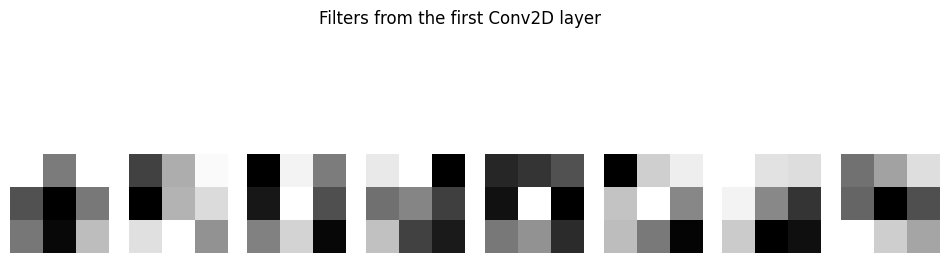

In [6]:
first_layer = model.layers[0]
weights, biases = first_layer.get_weights()

print("Shape of filters:", weights.shape)  # (3, 3, 1, 32)

# Tampilkan beberapa filter
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(8):
    f = weights[:, :, 0, i]
    plt.subplot(1, 8, i+1)
    plt.imshow(f, cmap="gray")
    plt.axis("off")
plt.suptitle("Filters from the first Conv2D layer")
plt.show()